In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/labels.csv')

In [3]:
labels = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labels.drop(columns =[0,2], inplace = True)
labels.columns = ["img_name"  , "smiling"]
labels = labels.astype({'smiling': 'int32'})
labels = labels.astype({'img_name': 'string'})


In [4]:
images = np.zeros((5000, 218, 178))

for i in range(0,5000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/img/' + labels["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    images[i] = image
    
images = images.reshape(5000,38804)    #reshape by stitching each row together. # reshape back when wanting to see images
images


array([[233., 233., 233., ...,  66.,  68.,  68.],
       [ 56.,  54.,  54., ..., 116., 124., 124.],
       [255., 255., 255., ...,  93.,  94.,  94.],
       ...,
       [101.,  95.,  94., ...,  59.,  61.,  61.],
       [ 86.,  85.,  85., ...,  54.,  54.,  54.],
       [106., 106., 106., ...,  39.,  44.,  60.]])

In [5]:
images = pd.DataFrame(images) # form dataframe out of image array
images

,0,1,2,3,4,5,6,7,8,9,...,38794,38795,38796,38797,38798,38799,38800,38801,38802,38803
0,233.0,233.0,233.0,233.0,233.0,233.0,233.0,233.0,233.0,233.0,...,72.0,72.0,71.0,70.0,68.0,67.0,66.0,66.0,68.0,68.0
1,56.0,54.0,54.0,56.0,55.0,54.0,57.0,62.0,67.0,71.0,...,59.0,65.0,75.0,87.0,98.0,107.0,113.0,116.0,124.0,124.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,95.0,94.0,93.0,92.0,92.0,92.0,92.0,93.0,94.0,94.0
3,48.0,104.0,87.0,91.0,39.0,94.0,187.0,72.0,113.0,128.0,...,47.0,41.0,21.0,80.0,70.0,95.0,95.0,56.0,32.0,27.0
4,184.0,184.0,184.0,185.0,185.0,186.0,186.0,186.0,190.0,186.0,...,183.0,183.0,183.0,183.0,183.0,183.0,183.0,183.0,184.0,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4996,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0,...,14.0,14.0,14.0,15.0,15.0,16.0,16.0,16.0,17.0,17.0
4997,101.0,95.0,94.0,93.0,94.0,113.0,132.0,134.0,132.0,140.0,...,46.0,54.0,51.0,48.0,51.0,49.0,49.0,59.0,61.0,61.0
4998,86.0,85.0,85.0,84.0,84.0,85.0,85.0,86.0,83.0,78.0,...,56.0,55.0,54.0,53.0,53.0,53.0,53.0,54.0,54.0,54.0


In [28]:
model = tree.DecisionTreeClassifier(max_depth=3)

In [29]:
model.fit(images[0:1000],labels['smiling'][0:1000])

DecisionTreeClassifier(max_depth=3)

In [30]:
model.score(images[4000:5000],labels['smiling'][4000:5000])

0.753

In [31]:
# plt.imshow(images[1] , cmap='gray', vmin=0, vmax=255)
# plt.show()

In [32]:
#images = list(zip(images))
#images = pd.DataFrame(images,columns=["images"])
#labels = labels.assign(images = images)

In [33]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50

[Text(0.5, 0.875, 'X[31952] <= 119.5\ngini = 0.5\nsamples = 1000\nvalue = [490, 510]'),
 Text(0.25, 0.625, 'X[26807] <= 112.5\ngini = 0.356\nsamples = 358\nvalue = [275, 83]'),
 Text(0.125, 0.375, 'X[25876] <= 136.0\ngini = 0.494\nsamples = 151\nvalue = [84, 67]'),
 Text(0.0625, 0.125, 'gini = 0.481\nsamples = 102\nvalue = [41, 61]'),
 Text(0.1875, 0.125, 'gini = 0.215\nsamples = 49\nvalue = [43, 6]'),
 Text(0.375, 0.375, 'X[27319] <= 156.5\ngini = 0.143\nsamples = 207\nvalue = [191, 16]'),
 Text(0.3125, 0.125, 'gini = 0.084\nsamples = 183\nvalue = [175, 8]'),
 Text(0.4375, 0.125, 'gini = 0.444\nsamples = 24\nvalue = [16, 8]'),
 Text(0.75, 0.625, 'X[27127] <= 150.5\ngini = 0.445\nsamples = 642\nvalue = [215, 427]'),
 Text(0.625, 0.375, 'X[31224] <= 135.5\ngini = 0.325\nsamples = 480\nvalue = [98, 382]'),
 Text(0.5625, 0.125, 'gini = 0.487\nsamples = 179\nvalue = [75, 104]'),
 Text(0.6875, 0.125, 'gini = 0.141\nsamples = 301\nvalue = [23, 278]'),
 Text(0.875, 0.375, 'X[28212] <= 211.5\n

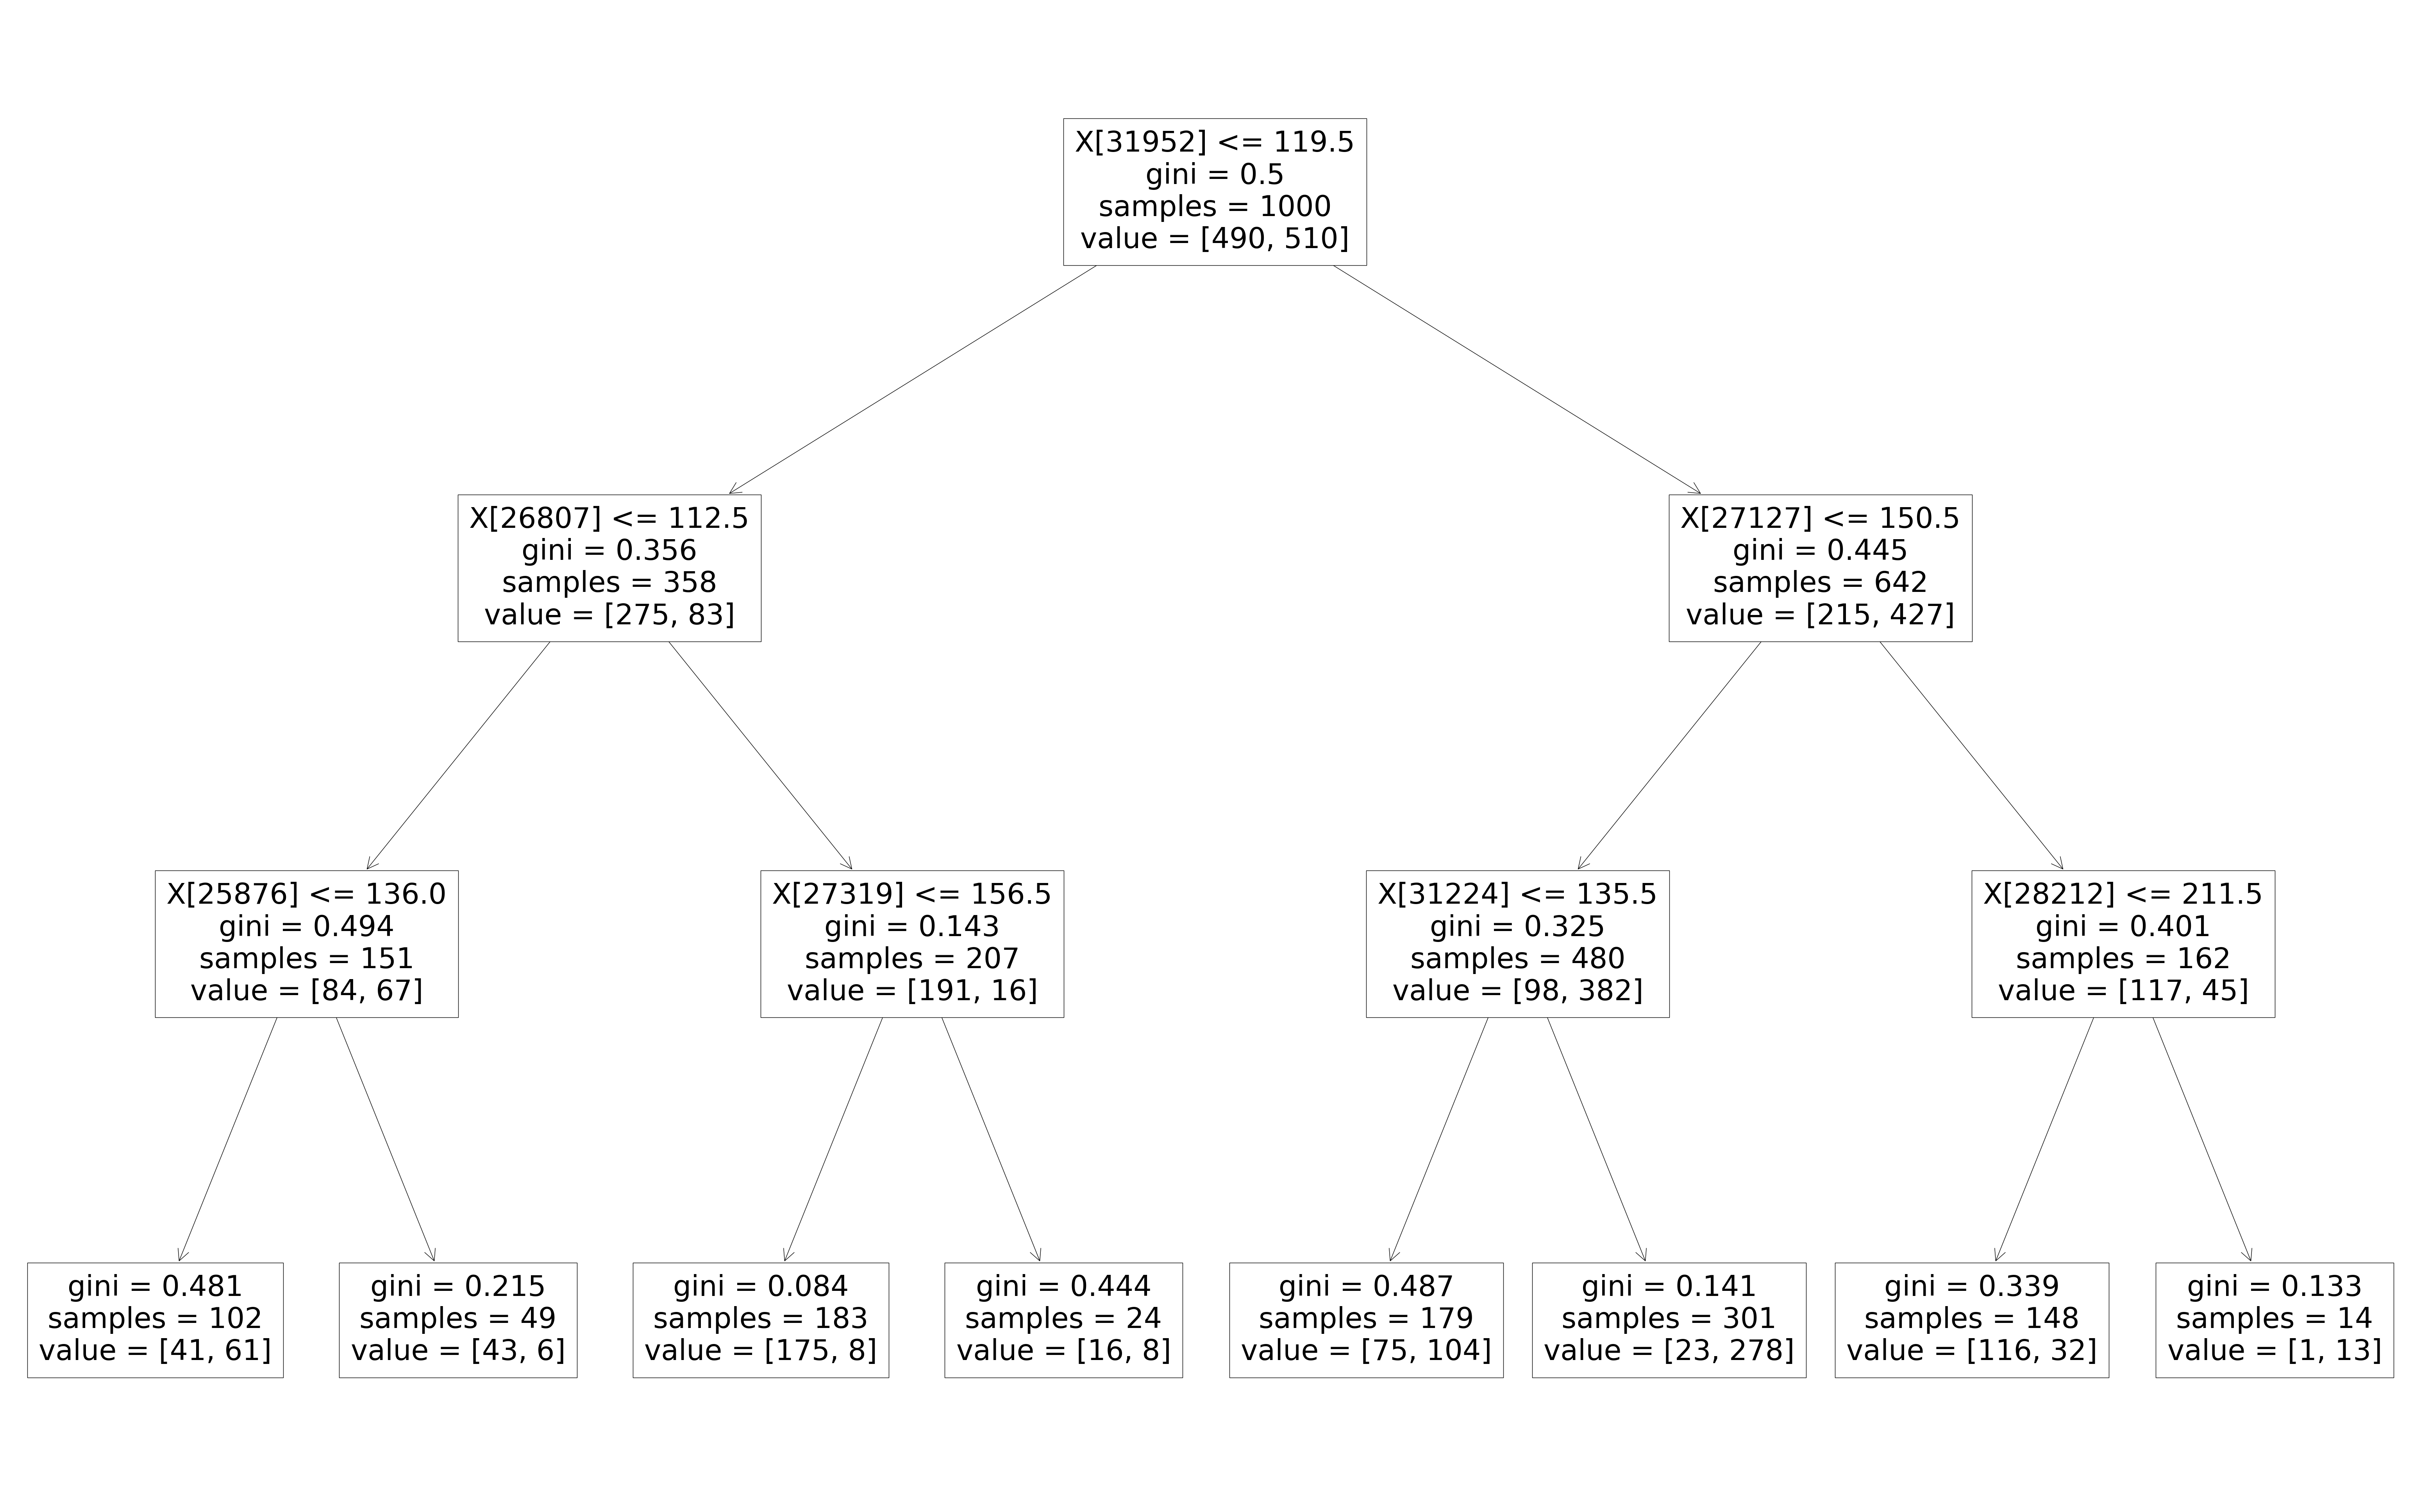

In [34]:
plot_tree(model)